In [1]:
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

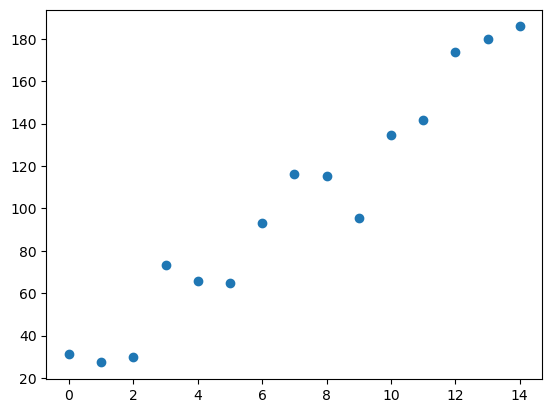

In [76]:
# generate random data points
num_data_points = 15
scale = 10
bias = 4

x = [i for i in range(num_data_points)]
y = [scale*i + bias + random.random() * 50 for i in range(num_data_points)]

plt.scatter(x,y)

In [3]:
def initialize_random_weight():
    return random.random(), random.random()

def forward_pass(weight, bias, x):
    return [weight * data + bias for data in x]

def loss_function(prediction, real):
    return (prediction - real)**2

def cost_function(predicted_y, real_y): 
    assert len(predicted_y) == len(real_y)
    cost = 0
    for prediction,real in zip(predicted_y, real_y):
        cost += loss_function(prediction, real)
    
    return cost/(2*len(predicted_y))

def dj_dw(x, y, weight, bias):
    predictions = forward_pass(weight, bias, x)
    cost = 0
    for prediction, real, input_ in zip(predictions, y, x):
        cost += (prediction - real) * input_
    return cost / len(predictions)

def dj_db(x, y, weight, bias):
    predictions = forward_pass(weight, bias, x)
    cost = 0
    for prediction, real, input_ in zip(predictions, y, x):
        cost += (prediction - real) 
    return cost / len(predictions)

def gradient_step(x, y, weight, bias, alpha): 
    tmp_w = weight - alpha * dj_dw(x, y, weight, bias)
    tmp_b = bias - alpha * dj_db(x, y, weight, bias)

    return tmp_w, tmp_b

def create_batches(x, y, batch_size):
    for start_idx in range(0, len(x), batch_size):
        excerpt = slice(start_idx, start_idx + batch_size)
        yield x[excerpt], y[excerpt]

4728.1704309143


Text(0.5, 1.0, 'Model predictions')

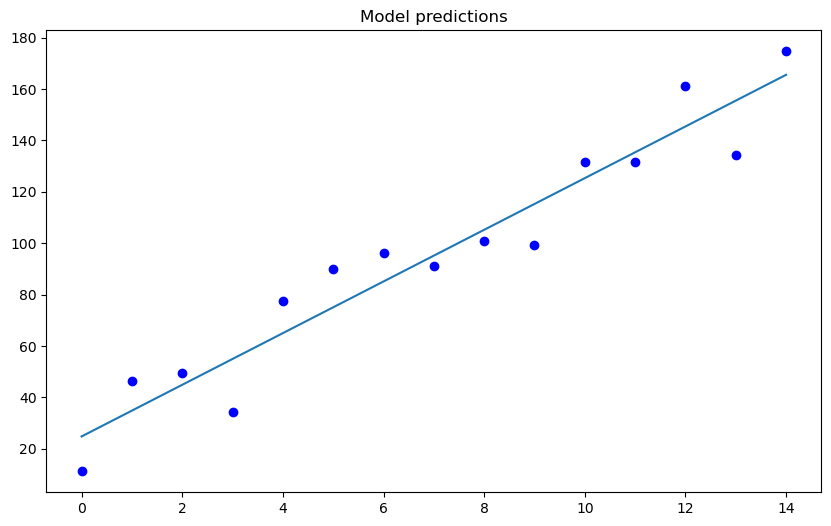

In [4]:
weight, bias = initialize_random_weight()
prediction = forward_pass(weight, bias, x)
cost = cost_function(prediction, y)
print(cost)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data points')
costs = []
num_epochs = 100
batch_size = 1
for i in range(num_epochs):
    for batch_x, batch_y in create_batches(x, y, batch_size):
        weight, bias = gradient_step(x, y, weight, bias, 0.01)  
    prediction = forward_pass(weight, bias, x)
    cost = cost_function(prediction, y)
    costs.append(cost)   

plt.plot(x, prediction) 
plt.title("Model predictions")

Text(0.5, 1.0, 'Cost per epoch')

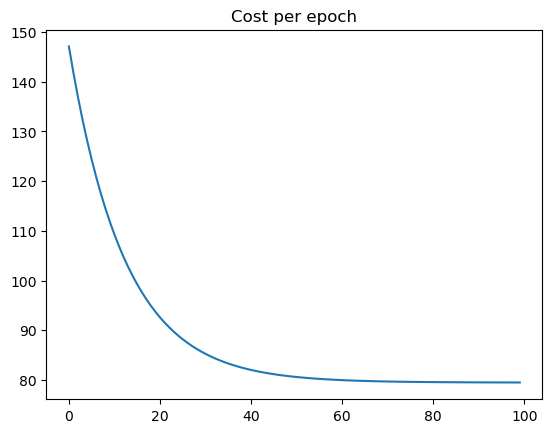

In [5]:
plt.plot([x for x in range(num_epochs)], costs)
plt.title("Cost per epoch")

Multi Variate

In [97]:
num_data = 15
x_scale = 1
y_scale = 1
bias = 0

# inputs
x = np.array([i for i in range(num_data)])
y = np.array([i for i in range(num_data)])

# outputs
z = np.array([x_scale*i + y_scale*i + bias + random.random()*30 for i in range(num_data)])


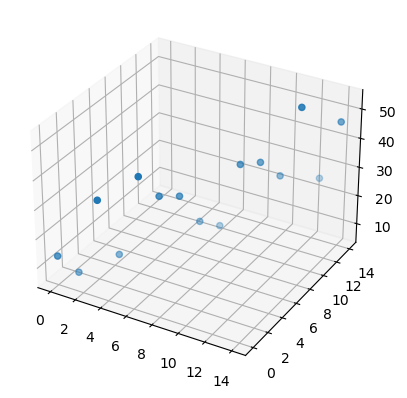

In [98]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

In [99]:
# adding a column of ones to input to vectorize bias addition
input_ = np.array([x, y, np.ones(len(x))])

In [100]:
def initialize_random_weights(num_weights):
    return np.array([random.random() for i in range(num_weights)])

def multivariate_forward_pass(weights, inputs):
    return np.dot(weights, inputs)

def vectorized_mse(predictions, real):
    return (np.sum((predictions - real) ** 2))/ (2 * len(predictions))

def vectorized_dj_dw(weights, inputs, real):
    prediction = multivariate_forward_pass(weights, inputs)
    loss = (prediction - real).reshape(-1, 1)
    return np.squeeze(np.dot(np.transpose(loss), np.transpose(inputs[:-1]))) / len(loss)

def vectorized_dj_db(weights, inputs, real):
    predictions = multivariate_forward_pass(weights, inputs)
    return np.sum(predictions - real) / len(predictions)

def gradient_step(weights, inputs, real, alpha):
    tmp_weights = weights[:-1] - alpha * vectorized_dj_dw(weights, inputs, real)
    tmp_bias = weights[-1] - alpha * vectorized_dj_db(weights, inputs, real)
    return np.append(tmp_weights, tmp_bias)

In [101]:
import time
test_pred = 50 * np.ones(1000000)
test_real = 30 * np.ones(1000000)

start = time.time()
cost_function(test_pred, test_real)
end = time.time()
print(f"non vectorized finished in {end - start}") # 0.23 seconds

start = time.time()
vectorized_mse(test_pred, test_real)
end = time.time()
print(f"vectorized finished in {end - start}") # 0.0027 seconds nearly 100 times faster!

non vectorized finished in 0.23989009857177734
vectorized finished in 0.0023941993713378906


In [108]:
weights = initialize_random_weights(3)
prediction = multivariate_forward_pass(weights, input_)
cost = vectorized_mse(prediction, z)
num_epochs = 100
costs = []

for i in range(num_epochs): 
    weights = gradient_step(weights, input_, z, 0.001)
    prediction = multivariate_forward_pass(weights, input_)
    cost = vectorized_mse(prediction, z)
    costs.append(cost)

print(cost)

66.41891469350838


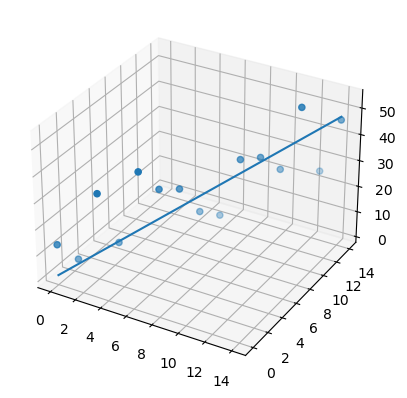

In [109]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)
ax.plot(x, y, prediction)

Text(0.5, 1.0, 'Cost per epoch')

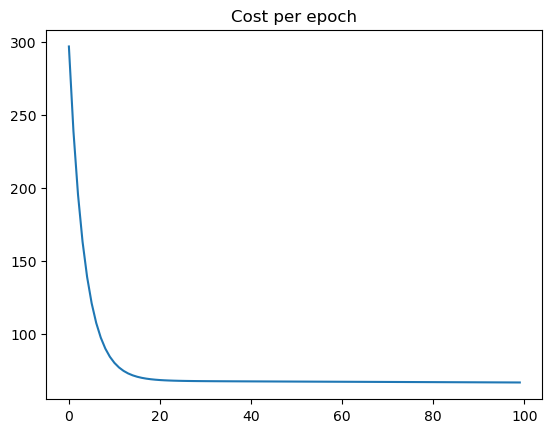

In [110]:
plt.plot([x for x in range(num_epochs)], costs)
plt.title("Cost per epoch")